# Using Real Img

## Preview of Cropped Imgs

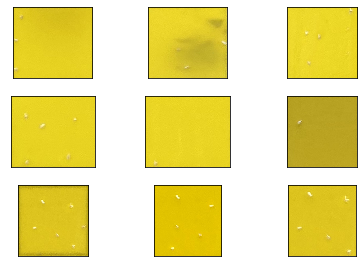

In [2]:
## define support functions
import math
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
        
def get_file_path_from_folder(path):
    g = os.walk(path)
    tmp_lst = list()
    for _,_,file_list in g:
        for file_name in file_list:
            tmp_lst.append(os.path.join(path,file_name))
    return tmp_lst

def show_img_file(file_path):
    img = Image.open(file_path)
    plt.imshow(img, interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.show() 

def show_imgs_in_folder(path):
    file_list = get_file_path_from_folder(path)
    img_lst = list()
    
    for i in range(len(file_list)):
        img = Image.open(file_list[i])
        img_lst.append(img)
        
    #fig = plt.figure()
    rect_size = math.ceil(math.sqrt(len(img_lst)))
    if math.floor(math.sqrt(len(img_lst)))*math.ceil(math.sqrt(len(img_lst))) >len (img_lst):
        rect_size_a = math.floor(math.sqrt(len(img_lst)))
        rect_size_b = math.ceil(math.sqrt(len(img_lst)))
    else:
        rect_size_a = rect_size_b = math.ceil(math.sqrt(len(img_lst)))
        
    for i in range(len(img_lst)):
        plt.subplot(rect_size_a,rect_size_b,i+1)
        plt.tight_layout()
        plt.imshow(img_lst[i], interpolation='none')
        plt.xticks([])
        plt.yticks([])
    plt.show()


path = "./img/"
show_imgs_in_folder(path)
#show_img_file(get_file_path_from_folder(path)[0])

# 百度图像清晰度增强

In [298]:
## API code
import os

# NL-Means算法

In [299]:
def imnlmeans_naive(img, sigma, s1, s2, p1,p2, h):

    # backup
    img_out = np.zeros((img.shape[0],img.shape[1]))

    # padding
    pad = int((s1+s2)/2 + (p1+p2)/2)
    img_pad = np.lib.pad(img, pad, 'symmetric')
    # plt.imshow(img_pad, cmap=plt.cm.gray)
    # plt.show()
    hight = img.shape[0]
    width = img.shape[1]
    P = (2*p1+1)*(2*p2+1)
    patch = 0
    patch2 = 0
    Z = 0
    for i in range(s1+p1,hight+s1+p1+1):
        for j in range(s2+p2,width+s2+p2+1):
            for i1 in range(i-s1,i+s1+1):
                for j1 in range(j-s2,j+s2+1):
                    for i2 in range(i1-p1,i1+p1+1):
                        for j2 in range(j1-p2,j1+p2+1):
                            patch = patch + (img_pad[i2,j2] - img_pad[i2+p1+s1,j1+p2+s2])**2
                    patch = patch / P
                    f = fai(patch, sigma, h, P)
                    patch2 = patch2 + f*img_pad[i1,j1]
                    Z = Z + f
            img_out[i-s1-p1,j-s2-p2] = 1.0/Z*patch2

 # 小波阈值去噪

In [301]:
#模块调用
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pywt 

#封装成函数
def sgn(num):
    if(num > 0.0):
        return 1.0
    elif(num == 0.0):
        return 0.0
    else:
        return -1.0

def wavelet_noising(new_df):
    data = new_df
    data = data.values.T.tolist()  # 将np.ndarray()转为列表
    w = pywt.Wavelet('sym8')
    # [ca3, cd3, cd2, cd1] = pywt.wavedec(data, w, level=3)  # 分解波
    [ca5, cd5, cd4, cd3, cd2, cd1] = pywt.wavedec(data, w, level=5)  # 分解波

    length1 = len(cd1)
    length0 = len(data)

    Cd1 = np.array(cd1)
    abs_cd1 = np.abs(Cd1)
    median_cd1 = np.median(abs_cd1)

    sigma = (1.0 / 0.6745) * median_cd1
    lamda = sigma * math.sqrt(2.0 * math.log(float(length0 ), math.e))
    usecoeffs = []
    usecoeffs.append(ca5)  # 向列表末尾添加对象

    #软硬阈值折中的方法
    a = 0.5

    for k in range(length1):
        if (abs(cd1[k]) >= lamda):
            cd1[k] = sgn(cd1[k]) * (abs(cd1[k]) - a * lamda)
        else:
            cd1[k] = 0.0

    length2 = len(cd2)
    for k in range(length2):
        if (abs(cd2[k]) >= lamda):
            cd2[k] = sgn(cd2[k]) * (abs(cd2[k]) - a * lamda)
        else:
            cd2[k] = 0.0

    length3 = len(cd3)
    for k in range(length3):
        if (abs(cd3[k]) >= lamda):
            cd3[k] = sgn(cd3[k]) * (abs(cd3[k]) - a * lamda)
        else:
            cd3[k] = 0.0

    length4 = len(cd4)
    for k in range(length4):
        if (abs(cd4[k]) >= lamda):
            cd4[k] = sgn(cd4[k]) * (abs(cd4[k]) - a * lamda)
        else:
            cd4[k] = 0.0

    length5 = len(cd5)
    for k in range(length5):
        if (abs(cd5[k]) >= lamda):
            cd5[k] = sgn(cd5[k]) * (abs(cd5[k]) - a * lamda)
        else:
            cd5[k] = 0.0

    usecoeffs.append(cd5)
    usecoeffs.append(cd4)
    usecoeffs.append(cd3)
    usecoeffs.append(cd2)
    usecoeffs.append(cd1)
    recoeffs = pywt.waverec(usecoeffs, w)
    return recoeffs

#主函数
path ='C:\\Users\\Administrator\\Desktop\\data\\08_863628460_0005_0.asc'#数据路径

#提取数据
#data = pd.read_csv(path)
#data = data.iloc[:, 1]
#plt.plot(data)
#plt.show()
#print(data)

#data_denoising = wavelet_noising(data)#调用小波去噪函数
#plt.plot(data_denoising)#显示去噪结果

## K-Means and Binarization

In [143]:
## BM3D algo
# -*- coding: utf-8 -*-
import cv2
import math
import numpy


# Parameters initialization
sigma = 25
Threshold_Hard3D = 2.7*sigma           # Threshold for Hard Thresholding
First_Match_threshold = 250             # 用于计算block之间相似度的阈值
Step1_max_matched_cnt = 16              # 组最大匹配的块数
Step1_Blk_Size = 8                     # block_Size即块的大小，8*8
# Rather than sliding by one pixel to every next reference block, 
# use a step of Nstep pixels in both horizontal and vertical directions.

Step1_Blk_Step = 3                      
Step1_Search_Step = 3                   # 块的搜索step
# Search for candidate matching blocks in a local neighborhood of restricted size NS*NS centered
Step1_Search_Window = 39                
Second_Match_threshold = 40           # 用于计算block之间相似度的阈值
Step2_max_matched_cnt = 32
Step2_Blk_Size = 8
Step2_Blk_Step = 3
Step2_Search_Step = 3
Step2_Search_Window = 39
Beta_Kaiser = 2.0

def PSNR(img1, img2):
    D = numpy.array(img1 - img2, dtype=numpy.int64)
    D[:, :] = D[:, :]**2
    RMSE = D.sum()/img1.size
    psnr = 10*math.log10(float(255.**2)/RMSE)
    return psnr


def init(img, _blk_size, _Beta_Kaiser):
    """该函数用于初始化，返回用于记录过滤后图像以及权重的数组,还有构造凯撒窗"""
    m_shape = img.shape
    m_img = numpy.matrix(numpy.zeros(m_shape, dtype=float))
    m_wight = numpy.matrix(numpy.zeros(m_shape, dtype=float))
    K = numpy.matrix(numpy.kaiser(_blk_size, _Beta_Kaiser))
    m_Kaiser = numpy.array(K.T * K)            # 构造一个凯撒窗
    return m_img, m_wight, m_Kaiser


def Locate_blk(i, j, blk_step, block_Size, width, height):
    '''该函数用于保证当前的blk不超出图像范围'''
    if i*blk_step+block_Size < width:
        point_x = i*blk_step
    else:
        point_x = width - block_Size

    if j*blk_step+block_Size < height:
        point_y = j*blk_step
    else:
        point_y = height - block_Size

    m_blockPoint = numpy.array((point_x, point_y), dtype=int)  # 当前参考图像的顶点

    return m_blockPoint


def Define_SearchWindow(_noisyImg, _BlockPoint, _WindowSize, Blk_Size):
    """该函数返回一个二元组（x,y）,用以界定_Search_Window顶点坐标"""
    point_x = _BlockPoint[0]  # 当前坐标
    point_y = _BlockPoint[1]  # 当前坐标

    # 获得SearchWindow四个顶点的坐标
    LX = point_x+Blk_Size/2-_WindowSize/2     # 左上x
    LY = point_y+Blk_Size/2-_WindowSize/2     # 左上y
    RX = LX+_WindowSize                       # 右下x
    RY = LY+_WindowSize                       # 右下y

    # 判断一下是否越界
    if LX < 0:   LX = 0
    elif RX > _noisyImg.shape[0]:   LX = _noisyImg.shape[0]-_WindowSize
    if LY < 0:   LY = 0
    elif RY > _noisyImg.shape[0]:   LY = _noisyImg.shape[0]-_WindowSize

    return numpy.array((LX, LY), dtype=int)


def Step1_fast_match(_noisyImg, _BlockPoint):
    """快速匹配"""
    '''
    *返回邻域内寻找和当前_block相似度最高的几个block,返回的数组中包含本身
    *_noisyImg:噪声图像
    *_BlockPoint:当前block的坐标及大小
    '''
    (present_x, present_y) = _BlockPoint  # 当前坐标
    Blk_Size = Step1_Blk_Size
    Search_Step = Step1_Search_Step
    Threshold = First_Match_threshold
    max_matched = Step1_max_matched_cnt
    Window_size = Step1_Search_Window

    blk_positions = numpy.zeros((max_matched, 2), dtype=int)  # 用于记录相似blk的位置
    Final_similar_blocks = numpy.zeros((max_matched, Blk_Size, Blk_Size), dtype=float)

    img = _noisyImg[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
    dct_img = cv2.dct(img.astype(numpy.float64))  # 对目标作block作二维余弦变换

    Final_similar_blocks[0, :, :] = dct_img
    blk_positions[0, :] = _BlockPoint

    Window_location = Define_SearchWindow(_noisyImg, _BlockPoint, Window_size, Blk_Size)
    blk_num = (Window_size-Blk_Size)/Search_Step  # 确定最多可以找到多少相似blk
    blk_num = int(blk_num)
    (present_x, present_y) = Window_location

    similar_blocks = numpy.zeros((blk_num**2, Blk_Size, Blk_Size), dtype=float)
    m_Blkpositions = numpy.zeros((blk_num**2, 2), dtype=int)
    Distances = numpy.zeros(blk_num**2, dtype=float)  # 记录各个blk与它的相似度

    # 开始在_Search_Window中搜索,初始版本先采用遍历搜索策略,这里返回最相似的几块
    matched_cnt = 0
    for i in range(blk_num):
        for j in range(blk_num):
            tem_img = _noisyImg[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
            dct_Tem_img = cv2.dct(tem_img.astype(numpy.float64))
            m_Distance = numpy.linalg.norm((dct_img-dct_Tem_img))**2 / (Blk_Size**2)

            # 下面记录数据自动不考虑自身(因为已经记录)
            if m_Distance < Threshold and m_Distance > 0:  # 说明找到了一块符合要求的
                similar_blocks[matched_cnt, :, :] = dct_Tem_img
                m_Blkpositions[matched_cnt, :] = (present_x, present_y)
                Distances[matched_cnt] = m_Distance
                matched_cnt += 1
            present_y += Search_Step
        present_x += Search_Step
        present_y = Window_location[1]
    Distances = Distances[:matched_cnt]
    Sort = Distances.argsort()

    # 统计一下找到了多少相似的blk
    if matched_cnt < max_matched:
        Count = matched_cnt + 1
    else:
        Count = max_matched

    if Count > 0:
        for i in range(1, Count):
            Final_similar_blocks[i, :, :] = similar_blocks[Sort[i-1], :, :]
            blk_positions[i, :] = m_Blkpositions[Sort[i-1], :]
    return Final_similar_blocks, blk_positions, Count


def Step1_3DFiltering(_similar_blocks):
    '''
    *3D变换及滤波处理
    *_similar_blocks:相似的一组block,这里已经是频域的表示
    *要将_similar_blocks第三维依次取出,然在频域用阈值滤波之后,再作反变换
    '''
    statis_nonzero = 0  # 非零元素个数
    m_Shape = _similar_blocks.shape

    # 下面这一段代码很耗时
    for i in range(m_Shape[1]):
        for j in range(m_Shape[2]):
            tem_Vct_Trans = cv2.dct(_similar_blocks[:, i, j])
            tem_Vct_Trans[numpy.abs(tem_Vct_Trans[:]) < Threshold_Hard3D] = 0.
            statis_nonzero += tem_Vct_Trans.nonzero()[0].size
            _similar_blocks[:, i, j] = cv2.idct(tem_Vct_Trans)[0]
    return _similar_blocks, statis_nonzero


def Aggregation_hardthreshold(_similar_blocks, blk_positions, m_basic_img, m_wight_img, _nonzero_num, Count, Kaiser):
    '''
    *对3D变换及滤波后输出的stack进行加权累加,得到初步滤波的图片
    *_similar_blocks:相似的一组block,这里是频域的表示
    *对于最后的数组，乘以凯撒窗之后再输出
    '''
    _shape = _similar_blocks.shape
    if _nonzero_num < 1:
        _nonzero_num = 1
    block_wight = (1./_nonzero_num) * Kaiser
    for i in range(Count):
        point = blk_positions[i, :]
        tem_img = (1./_nonzero_num)*cv2.idct(_similar_blocks[i, :, :]) * Kaiser
        m_basic_img[point[0]:point[0]+_shape[1], point[1]:point[1]+_shape[2]] += tem_img
        m_wight_img[point[0]:point[0]+_shape[1], point[1]:point[1]+_shape[2]] += block_wight


def BM3D_1st_step(_noisyImg):
    """第一步,基本去噪"""
    # 初始化一些参数：
    (width, height) = _noisyImg.shape   # 得到图像的长宽
    block_Size = Step1_Blk_Size         # 块大小
    blk_step = Step1_Blk_Step           # N块步长滑动
    Width_num = (width - block_Size)/blk_step
    Height_num = (height - block_Size)/blk_step

    # 初始化几个数组
    Basic_img, m_Wight, m_Kaiser = init(_noisyImg, Step1_Blk_Size, Beta_Kaiser)

    # 开始逐block的处理,+2是为了避免边缘上不够
    for i in range(int(Width_num+2)):
        for j in range(int(Height_num+2)):
            # m_blockPoint当前参考图像的顶点
            m_blockPoint = Locate_blk(i, j, blk_step, block_Size, width, height)       # 该函数用于保证当前的blk不超出图像范围
            Similar_Blks, Positions, Count = Step1_fast_match(_noisyImg, m_blockPoint)
            Similar_Blks, statis_nonzero = Step1_3DFiltering(Similar_Blks)
            Aggregation_hardthreshold(Similar_Blks, Positions, Basic_img, m_Wight, statis_nonzero, Count, m_Kaiser)
    Basic_img[:, :] /= m_Wight[:, :]
    basic = numpy.matrix(Basic_img, dtype=int)
    basic.astype(numpy.uint8)

    return basic


def Step2_fast_match(_Basic_img, _noisyImg, _BlockPoint):
    '''
    *快速匹配算法,返回邻域内寻找和当前_block相似度最高的几个block,要同时返回basicImg和IMG
    *_Basic_img: 基础去噪之后的图像
    *_noisyImg:噪声图像
    *_BlockPoint:当前block的坐标及大小
    '''
    (present_x, present_y) = _BlockPoint  # 当前坐标
    Blk_Size = Step2_Blk_Size
    Threshold = Second_Match_threshold
    Search_Step = Step2_Search_Step
    max_matched = Step2_max_matched_cnt
    Window_size = Step2_Search_Window

    blk_positions = numpy.zeros((max_matched, 2), dtype=int)  # 用于记录相似blk的位置
    Final_similar_blocks = numpy.zeros((max_matched, Blk_Size, Blk_Size), dtype=float)
    Final_noisy_blocks = numpy.zeros((max_matched, Blk_Size, Blk_Size), dtype=float)

    img = _Basic_img[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
    dct_img = cv2.dct(img.astype(numpy.float32))  # 对目标作block作二维余弦变换
    Final_similar_blocks[0, :, :] = dct_img

    n_img = _noisyImg[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
    dct_n_img = cv2.dct(n_img.astype(numpy.float32))  # 对目标作block作二维余弦变换
    Final_noisy_blocks[0, :, :] = dct_n_img

    blk_positions[0, :] = _BlockPoint

    Window_location = Define_SearchWindow(_noisyImg, _BlockPoint, Window_size, Blk_Size)
    blk_num = (Window_size-Blk_Size)/Search_Step  # 确定最多可以找到多少相似blk
    blk_num = int(blk_num)
    (present_x, present_y) = Window_location

    similar_blocks = numpy.zeros((blk_num**2, Blk_Size, Blk_Size), dtype=float)
    m_Blkpositions = numpy.zeros((blk_num**2, 2), dtype=int)
    Distances = numpy.zeros(blk_num**2, dtype=float)  # 记录各个blk与它的相似度

    # 开始在_Search_Window中搜索,初始版本先采用遍历搜索策略,这里返回最相似的几块
    matched_cnt = 0
    for i in range(blk_num):
        for j in range(blk_num):
            tem_img = _Basic_img[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
            dct_Tem_img = cv2.dct(tem_img.astype(numpy.float32))
            m_Distance = numpy.linalg.norm((dct_img-dct_Tem_img))**2 / (Blk_Size**2)

            # 下面记录数据自动不考虑自身(因为已经记录)
            if m_Distance < Threshold and m_Distance > 0:
                similar_blocks[matched_cnt, :, :] = dct_Tem_img
                m_Blkpositions[matched_cnt, :] = (present_x, present_y)
                Distances[matched_cnt] = m_Distance
                matched_cnt += 1
            present_y += Search_Step
        present_x += Search_Step
        present_y = Window_location[1]
    Distances = Distances[:matched_cnt]
    Sort = Distances.argsort()

    # 统计一下找到了多少相似的blk
    if matched_cnt < max_matched:
        Count = matched_cnt + 1
    else:
        Count = max_matched

    if Count > 0:
        for i in range(1, Count):
            Final_similar_blocks[i, :, :] = similar_blocks[Sort[i-1], :, :]
            blk_positions[i, :] = m_Blkpositions[Sort[i-1], :]

            (present_x, present_y) = m_Blkpositions[Sort[i-1], :]
            n_img = _noisyImg[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
            Final_noisy_blocks[i, :, :] = cv2.dct(n_img.astype(numpy.float64))

    return Final_similar_blocks, Final_noisy_blocks, blk_positions, Count


def Step2_3DFiltering(_Similar_Bscs, _Similar_Imgs):
    '''
    *3D维纳变换的协同滤波
    *_similar_blocks:相似的一组block,这里是频域的表示
    *要将_similar_blocks第三维依次取出,然后作dct,在频域进行维纳滤波之后,再作反变换
    *返回的Wiener_wight用于后面Aggregation
    '''
    m_Shape = _Similar_Bscs.shape
    Wiener_wight = numpy.zeros((m_Shape[1], m_Shape[2]), dtype=float)

    for i in range(m_Shape[1]):
        for j in range(m_Shape[2]):
            tem_vector = _Similar_Bscs[:, i, j]
            tem_Vct_Trans = numpy.matrix(cv2.dct(tem_vector))
            Norm_2 = numpy.float64(tem_Vct_Trans.T * tem_Vct_Trans)
            m_weight = Norm_2/(Norm_2 + sigma**2)
            if m_weight != 0:
                Wiener_wight[i, j] = 1./(m_weight**2 * sigma**2)
            # else:
            #     Wiener_wight[i, j] = 10000
            tem_vector = _Similar_Imgs[:, i, j]
            tem_Vct_Trans = m_weight * cv2.dct(tem_vector)
            _Similar_Bscs[:, i, j] = cv2.idct(tem_Vct_Trans)[0]

    return _Similar_Bscs, Wiener_wight


def Aggregation_Wiener(_Similar_Blks, _Wiener_wight, blk_positions, m_basic_img, m_wight_img, Count, Kaiser):
    '''
    *对3D变换及滤波后输出的stack进行加权累加,得到初步滤波的图片
    *_similar_blocks:相似的一组block,这里是频域的表示
    *对于最后的数组，乘以凯撒窗之后再输出
    '''
    _shape = _Similar_Blks.shape
    block_wight = _Wiener_wight # * Kaiser

    for i in range(Count):
        point = blk_positions[i, :]
        tem_img = _Wiener_wight * cv2.idct(_Similar_Blks[i, :, :]) # * Kaiser
        m_basic_img[point[0]:point[0]+_shape[1], point[1]:point[1]+_shape[2]] += tem_img
        m_wight_img[point[0]:point[0]+_shape[1], point[1]:point[1]+_shape[2]] += block_wight


def BM3D_2nd_step(_basicImg, _noisyImg):
    '''Step 2. 最终的估计: 利用基本的估计，进行改进了的分组以及协同维纳滤波'''
    # 初始化一些参数：
    (width, height) = _noisyImg.shape
    block_Size = Step2_Blk_Size
    blk_step = Step2_Blk_Step
    Width_num = (width - block_Size)/blk_step
    Height_num = (height - block_Size)/blk_step

    # 初始化几个数组
    m_img, m_Wight, m_Kaiser = init(_noisyImg, block_Size, Beta_Kaiser)

    for i in range(int(Width_num+2)):
        for j in range(int(Height_num+2)):
            m_blockPoint = Locate_blk(i, j, blk_step, block_Size, width, height)
            Similar_Blks, Similar_Imgs, Positions, Count = Step2_fast_match(_basicImg, _noisyImg, m_blockPoint)
            Similar_Blks, Wiener_wight = Step2_3DFiltering(Similar_Blks, Similar_Imgs)
            Aggregation_Wiener(Similar_Blks, Wiener_wight, Positions, m_img, m_Wight, Count, m_Kaiser)
    m_img[:, :] /= m_Wight[:, :]
    Final = numpy.matrix(m_img, dtype=int)
    Final.astype(numpy.uint8)

    return Final

    
def BM3D(path):
    cv2.setUseOptimized(True)
    # 读入图像，cv2.IMREAD_GRAYSCALE:以灰度模式读入图像
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    Basic_img = BM3D_1st_step(img)
    Final_img = BM3D_2nd_step(Basic_img, img)
    cv2.imwrite("./1.jpg", Final_img)
    plt.imshow(Final_img,'gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return Final_img
    

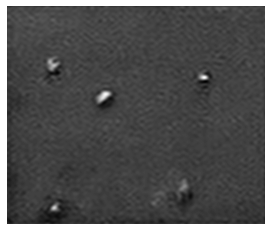

In [179]:
def DT_filter(path, n=30):
    img = cv2.imread(path,0)
    dft = cv2.dft(np.float64(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)#低频分量中心化处理，方便观察
    #设置振幅大小
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    #设置低通滤波器
    rows, cols = img.shape
    crow,ccol = int(rows/2), int(cols/2) #中心位置
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-n:crow+n, ccol-n:ccol+n] = 1#设置矩形窗口遮罩，设为1，过滤高频
    #掩膜图像和频谱图像乘积
    f = dft_shift * mask
    #傅里叶逆变换
    ishift = np.fft.ifftshift(f)
    iimg = cv2.idft(ishift)
    res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])
    #显示低通滤波处理图像
    plt.imshow(res, 'gray')
    plt.axis('off')

DT_filter(get_file_path_from_folder(path)[pic_num],n=40)

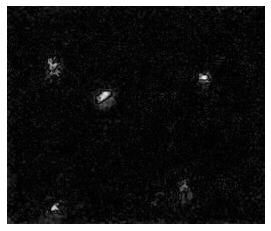

In [192]:
def GT_filter(path, n = 10):
    img = cv2.imread(path,0)#读图
    dft = cv2.dft(np.float64(img),flags = cv2.DFT_COMPLEX_OUTPUT)#设置输入格式为float32
    dft_shift = np.fft.fftshift(dft)#低频分量中心化处理，方便观察
    #设置振幅大小
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    #设置高通滤波器
    rows, cols = img.shape
    crow,ccol = int(rows/2), int(cols/2)
    fshift[crow-n:crow+n, ccol-n:ccol+n] = 0#设置矩形窗口遮罩，设为0，过滤低频
    #傅里叶逆变换
    ishift = np.fft.ifftshift(fshift)
    himg = np.fft.ifft2(ishift)
    himg = np.abs(himg)
    #显示高通滤波处理图像
    plt.imshow(himg, 'gray')
    plt.axis('off')
    plt.show()
    
    return himg
 
pic_num = 3
tmp_img = GT_filter(get_file_path_from_folder(path)[pic_num], n = 5)

In [ ]:
# 图像清晰度增强

import requests
import base64

request_url = "https://aip.baidubce.com/rest/2.0/image-process/v1/image_definition_enhance"
# 二进制方式打开图片文件
f = open('[本地文件]', 'rb')
img = base64.b64encode(f.read())

params = {"image":img}
access_token = '[调用鉴权接口获取的token]'
request_url = request_url + "?access_token=" + access_token
headers = {'content-type': 'application/x-www-form-urlencoded'}
response = requests.post(request_url, data=params, headers=headers)
if response:
    print (response.json())

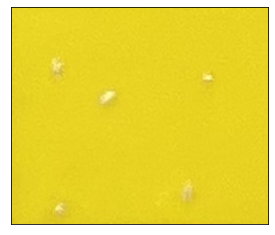

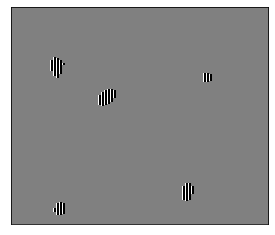

In [4]:
def pest_count_by_kmeans_and_binarz(path, num_clusters=2):
    Img = cv2.imread(path, 1)
    Img = Img[:,:,0]
    blur = cv2.GaussianBlur(Img, (9, 9), 0)
    #blur = cv2.bilateralFilter(Img, 5, 21, 21),
    
    # binarization
    ret, otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # k-means
    data = otsu.reshape((-1,3))
    data = np.float32(data)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(data, num_clusters, None, criteria, 
                           num_clusters, cv2.KMEANS_RANDOM_CENTERS)
    color = np.uint8([[255, 0, 0],[128, 128, 128]])
    res = color[label.flatten()]
    result = res.reshape((Img.shape))
    plt.imshow(result,'gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return result
    
pic_num = 3
path = "./img/"
show_img_file(get_file_path_from_folder(path)[pic_num])
result = pest_count_by_kmeans_and_binarz(get_file_path_from_folder(path)[pic_num])

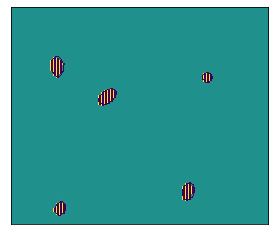

True

In [5]:
## Elliptical Fit
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cv.imwrite('ellipsefit_input.jpg',result)
src = cv.imread('ellipsefit_input.jpg',0)
blur = cv.GaussianBlur(src, (9, 9), 0)
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary = cv.Canny(otsu, 80, 80 * 2)

contours,_ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for c in range(len(contours)):
    if contours[c].size/2 >4:
        # 椭圆拟合
        (cx, cy), (a, b), angle = cv.fitEllipse(contours[c])
        # 绘制椭圆
        if (cx > 0) & (cy > 0):
            cv.ellipse(src, (np.int32(cx), np.int32(cy)),
               (np.int32(a/2), np.int32(b/2)), angle, 0, 360, (0, 0, 255), 1, 8)

plt.imshow(src),plt.xticks([]),plt.yticks([]),plt.show()
cv.imwrite("output.jpg",src)

In [6]:
## del alien object
import numpy as np

contour_area = list()
for i  in range(len(contours)):
    tmp_area = cv2.contourArea(contours[i],oriented = False)
    contour_area.append(tmp_area)
    
contour_area

[121.5, 183.5, 234.5, 77.0, 212.5]

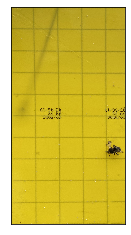

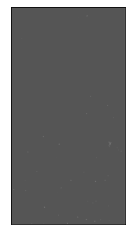

array([[255,   0,   0, ..., 128, 128, 128],
       [255,   0,   0, ..., 128, 128, 128],
       [255,   0,   0, ..., 128, 128, 128],
       ...,
       [255,   0,   0, ..., 128, 128, 128],
       [255,   0,   0, ..., 128, 128, 128],
       [255,   0,   0, ..., 128, 128, 128]], dtype=uint8)

In [8]:
path = r'./org/'
i = 0
path = get_file_path_from_folder(path)[i]
show_img_file(path)
pest_count_by_kmeans_and_binarz(path)

 # Image Extract

In [117]:
## sticky card crop function
def resizeImg(image, height=900):
    h, w = image.shape[:2]
    pro = height / h
    size = (int(w * pro), int(height))
    img = cv2.resize(image, size)
    return img

# 边缘检测
def getCanny(image):
    # 高斯模糊
    binary = cv2.GaussianBlur(image, (11, 11), 2, 2)
    # 边缘检测
    binary = cv2.Canny(binary, 60, 240, apertureSize=3)
    # 膨胀操作，尽量使边缘闭合
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.dilate(binary, kernel, iterations=1)
    return binary

# 求出面积最大的轮廓
def findMaxContour(image):
    # 寻找边缘
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # 计算面积
    max_area = 0.0
    max_contour = []
    for contour in contours:
        currentArea = cv2.contourArea(contour)
        if currentArea > max_area:
            max_area = currentArea
            max_contour = contour
    return max_contour, max_area

# 多边形拟合凸包的四个顶点
def getBoxPoint(contour):
    # 多边形拟合凸包
    hull = cv2.convexHull(contour)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    approx = approx.reshape((len(approx), 2))
    return approx

# 适配原四边形点集
def adaPoint(box, pro):
    box_pro = box
    if pro != 1.0:
        box_pro = box/pro
    box_pro = np.trunc(box_pro)
    return box_pro

# 四边形顶点排序
def orderPoints(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

# 计算长宽
def pointDistance(a, b):
    return int(np.sqrt(np.sum(np.square(a - b))))

# 透视变换
def warpImage(image, box):
    w, h = pointDistance(box[0], box[1]), \
           pointDistance(box[1], box[2])
    dst_rect = np.array([[0, 0],
                         [w - 1, 0],
                         [w - 1, h - 1],
                         [0, h - 1]], dtype='float32')
    M = cv2.getPerspectiveTransform(box, dst_rect)
    warped = cv2.warpPerspective(image, M, (w, h))
    return warped

def sticky_card_crop(path):
    image = cv2.imread(path,1)
    image[:,:,1] = 0
    ratio = 900 / image.shape[0]
    img = resizeImg(image)
    binary_img = getCanny(img)
    max_contour, max_area = findMaxContour(binary_img)
    boxes = getBoxPoint(max_contour)
    boxes = adaPoint(boxes, ratio)
    boxes = orderPoints(boxes)
    image = cv2.imread(path,1)
    warped = warpImage(image, boxes)
    cv2.imwrite("img_tmp.jpg", warped)
    Img = Image.open("img_tmp.jpg")
    plt.imshow(Img),plt.xticks([]),plt.yticks([])
    return warped

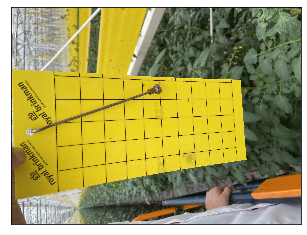

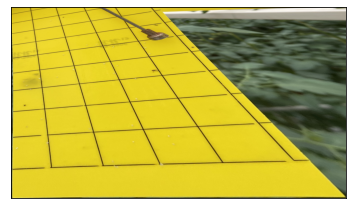

In [247]:
path = r'./org/'
i = 1
path = get_file_path_from_folder(path)[i]
show_img_file(path)
croped_img = sticky_card_crop(path)